<a href="https://colab.research.google.com/github/satlajyosthna/Fundamental/blob/main/Copy_of_intel_unnati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 5]

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:

df.isna().sum()

Battery_Power    0
Clock_Speed      0
FC               0
Int_Memory       0
Mobile_D         0
Mobile_W         0
Cores            0
PC               0
Pixel_H          0
Pixel_W          0
Ram              0
Screen_H         0
Screen_W         0
Talk_Time        0
Four_G           0
Three_G          0
Touch_Screen     0
Dual_SIM         0
Bluetooth        0
WiFi             0
Price_Range      0
dtype: int64

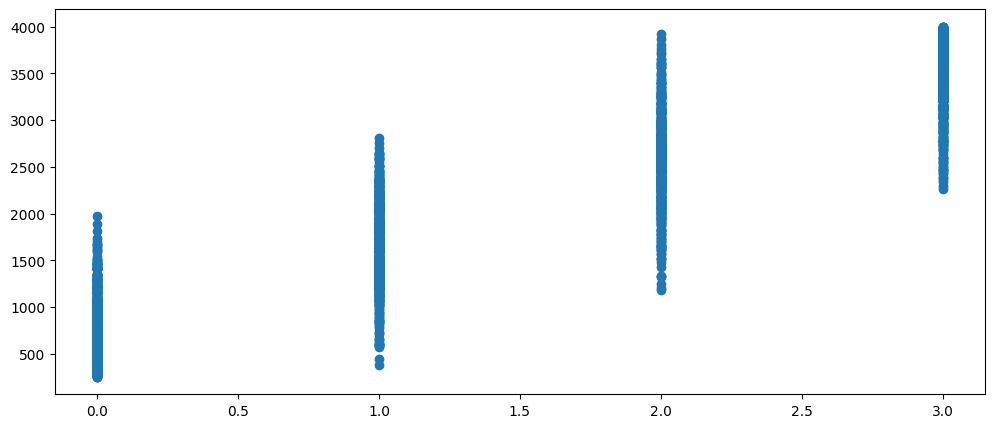

In [ ]:
plt.scatter(x=df['Price_Range'],y=df['Ram'])

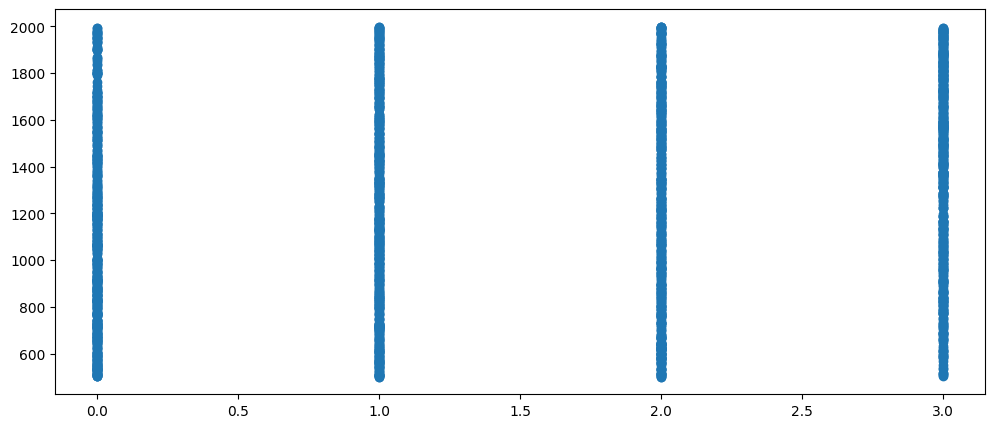

In [ ]:
plt.scatter(x=df['Price_Range'],y=df['Battery_Power'])

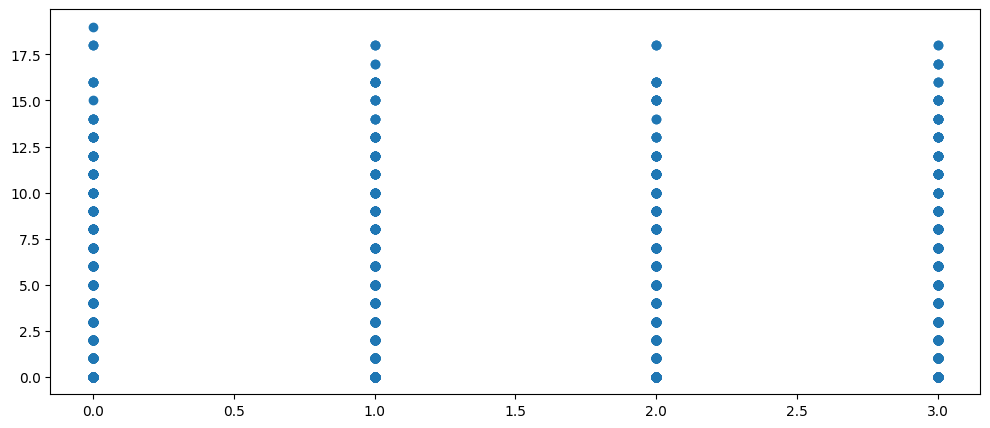

In [ ]:
plt.scatter(x=df['Price_Range'],y=df['FC'])

In [ ]:
pip install seaborn

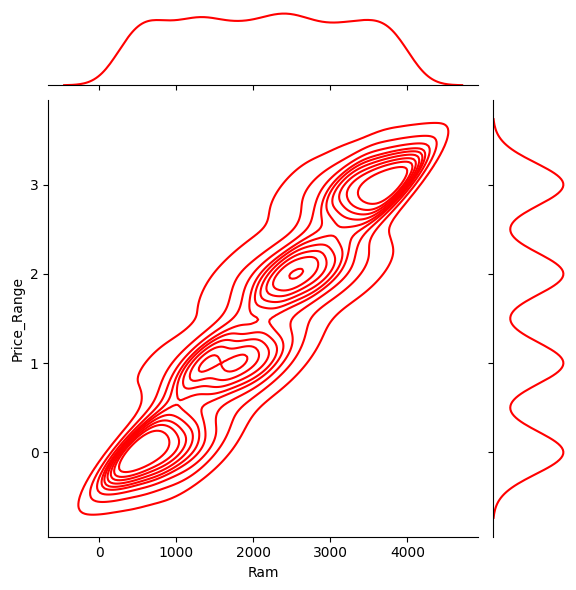

In [ ]:
sns.jointplot(x='Ram',y='Price_Range',data=df,color='red',kind='kde');


<Axes: xlabel='Price_Range', ylabel='Int_Memory'>

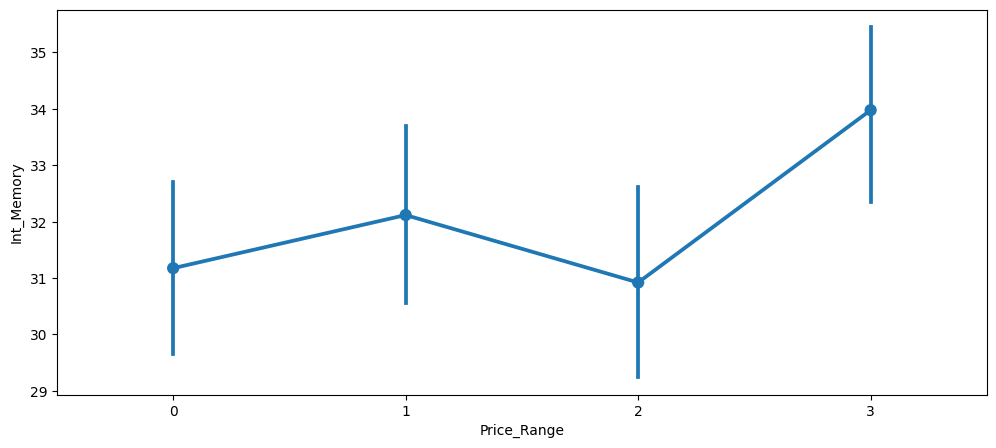

In [ ]:
sns.pointplot(y="Int_Memory", x="Price_Range", data=df)

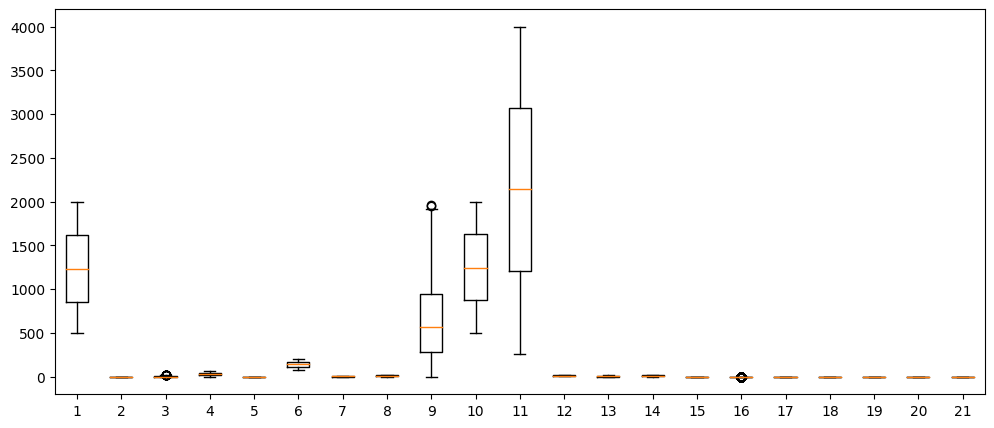

In [ ]:
plt.boxplot(df)
plt.show()

% of 3g users which supprots the phone

In [ ]:
labels = ["3G-supported",'Not supported']
values=df['Three_G'].value_counts().values

In [ ]:
def standerdize(x):
    return (x - x.mean())/x.std()

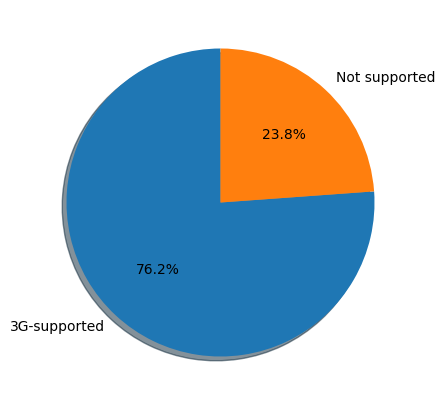

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

% of Phones which support 4G

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = df['Four_G'].value_counts().values

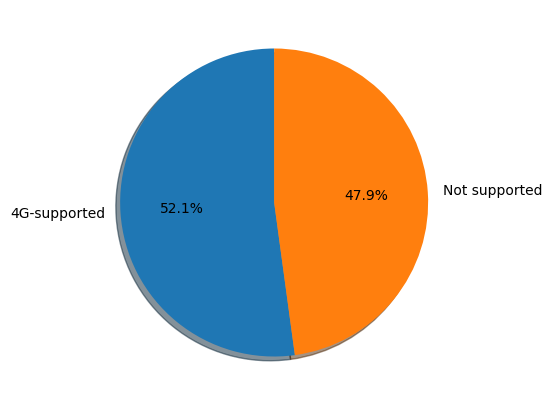

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

<Axes: xlabel='Price_Range', ylabel='Battery_Power'>

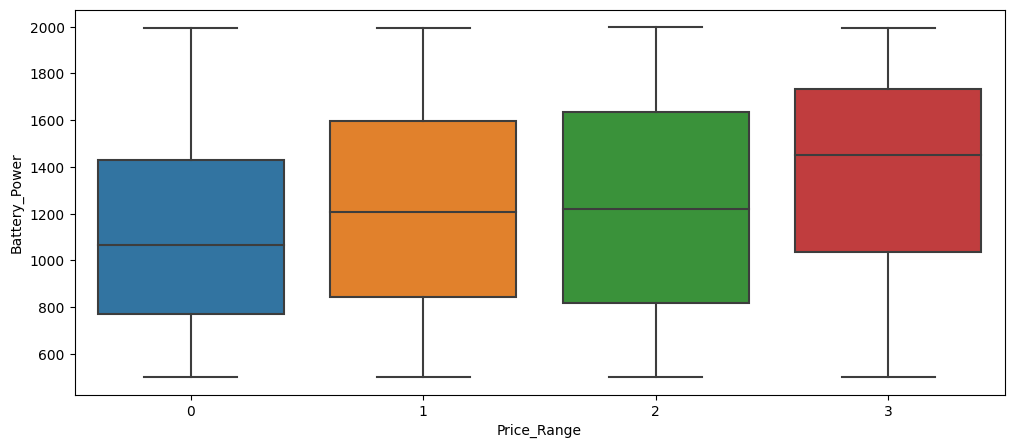

In [ ]:
# battery power vs battery range
sns.boxplot(x="Price_Range", y="Battery_Power", data=df)

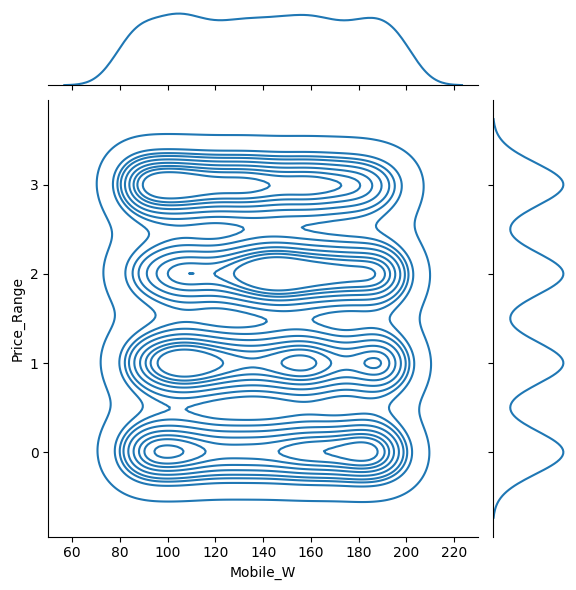

In [ ]:
# mobile price vs mobile wegiht
sns.jointplot(x='Mobile_W',y='Price_Range',kind='kde',data=df,);

In [ ]:
y=df['Price_Range']

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: Price_Range, Length: 2000, dtype: int64

In [ ]:
x=df.drop('Price_Range',axis=1)

In [ ]:
x

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,Ram,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,0,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,1,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,1,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,1,0,0,1,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,1,1,1,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,0,1,1,1,1,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,1,1,0,0
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [ ]:
X_train.shape

(1500, 20)

In [ ]:
X_test.shape

(500, 20)

In [ ]:
Y_train.shape

(1500,)

In [ ]:
Y_test.shape

(500,)

In [ ]:
standerdize_Dataframe = pd.DataFrame()

In [ ]:
for c in df.columns[1:]:
    standerdize_Dataframe[c] = standerdize(df[c])

In [ ]:
standerdize_Dataframe["Price_Range"] = df["Price_Range"]

In [ ]:
standerdize_Dataframe.head()

,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,Ram,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,0.830572,-0.762304,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.043705,-1.786414,-1.005767,-1.018929,-0.989802,0.985850,1
1,-1.252751,-0.992642,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.957646,0.559501,0.993769,0.980932,1.009798,-1.013846,2
2,-1.252751,-0.531966,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.957646,0.559501,0.993769,0.980932,1.009798,-1.013846,2
3,1.198217,-0.992642,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,-1.043705,0.559501,-1.005767,-1.018929,1.009798,-1.013846,2
4,-0.394912,2.001753,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.957646,0.559501,0.993769,-1.018929,1.009798,-1.013846,1


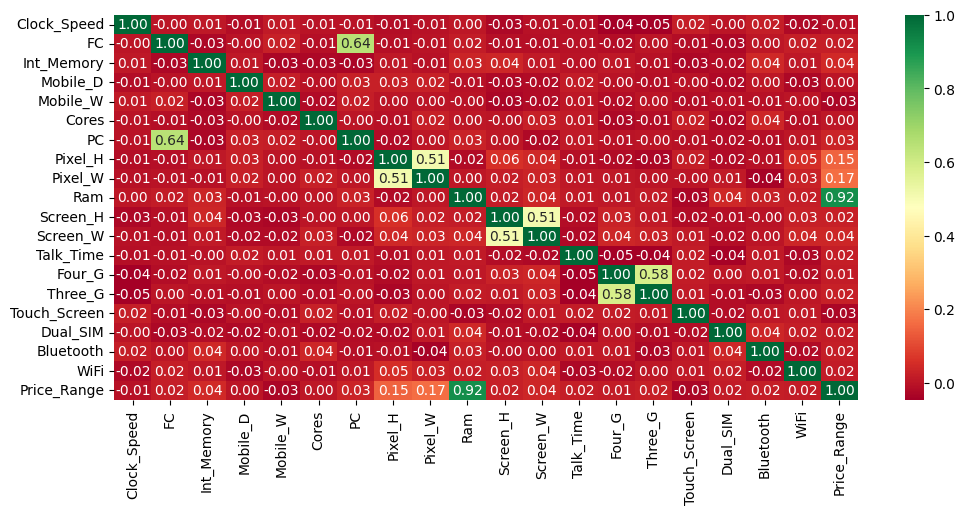

In [ ]:
_ = sns.heatmap(standerdize_Dataframe.corr(),cmap='RdYlGn',fmt = ".2f", annot=True)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 5)

In [ ]:
pca_model = pca.fit(standerdize_Dataframe[standerdize_Dataframe.columns[:-1]])

In [ ]:
X = pca_model.transform(standerdize_Dataframe[standerdize_Dataframe.columns[:-1]])

In [ ]:

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,df.Price_Range, test_size=0.2, random_state = 13223, shuffle=True)

In [ ]:
model_RMSE = {}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr_model = lr.fit(train_x,train_y)
pred = lr_model.predict(test_x)
model_RMSE["Linear Regression"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Linear Regression"]))

Root Mean Square Error: 1.02


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=6, random_state = 34)
rf_model = rf.fit(train_x, train_y)
pred = rf.predict(test_x)
model_RMSE["Random Forest"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Random Forest"]))

Root Mean Square Error: 1.15


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
knn_model = knn.fit(train_x, train_y)
pred = knn_model.predict(test_x)
model_RMSE["K Nearest"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["K Nearest"]))

Root Mean Square Error: 1.10


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.3,random_state = 124124)
gb_model = gb.fit(train_x, train_y)
pred = gb_model.predict(test_x)
model_RMSE["Gradient Boosting"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Gradient Boosting"]))

Root Mean Square Error: 1.05


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import RMSprop


l2 =  keras.regularizers.l2(0.001)

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(5,), kernel_regularizer = l2),
    keras.layers.Dense(8, activation='relu', kernel_regularizer = l2),
    keras.layers.Dense(8, activation='relu', kernel_regularizer = l2),
    keras.layers.Dense(1)
])


opt = RMSprop(learning_rate = 0.01, momentum=0.2)

model.compile(optimizer=opt, loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])


model.fit(train_x, train_y, epochs=500, batch_size=16)


pred = model.predict(test_x)
model_RMSE["Neural Network"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Neural Network"]))

Epoch 1/500
100/100 [==============================] - 1s 3ms/step - loss: 1.1738 - root_mean_squared_error: 1.0727
Epoch 2/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0806 - root_mean_squared_error: 1.0313
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0509 - root_mean_squared_error: 1.0183
Epoch 4/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0429 - root_mean_squared_error: 1.0149
Epoch 5/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0256 - root_mean_squared_error: 1.0065
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0287 - root_mean_squared_error: 1.0084
Epoch 7/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0293 - root_mean_squared_error: 1.0093
Epoch 8/500
100/100 [==============================] - 0s 3ms/step - loss: 1.0238 - root_mean_squared_error: 1.0066
Epoch 9/500
100/100 [==============================] - 0s 2ms/step - los

In [ ]:
def MeanRegressor(models, weights, X):
    m_p = [0]*len(X)
    inverse_weights = np.ones(len(weights))/weights
    newWeights = inverse_weights / inverse_weights.sum()


    for m,w in zip(models, newWeights):
        m_p += m.predict(X).reshape(len(X))*w

    return m_p/1

In [ ]:
pred = MeanRegressor([lr_model,rf_model, knn_model, gb_model, model],list(model_RMSE.values()),test_x)
model_RMSE["Mean Model"] = mean_squared_error(pred,test_y, squared=False)
print("Root Mean Square Error: {0:.2f}".format(model_RMSE["Mean Model"]))

13/13 [==============================] - 0s 2ms/step
Root Mean Square Error: 1.03


<Axes: >

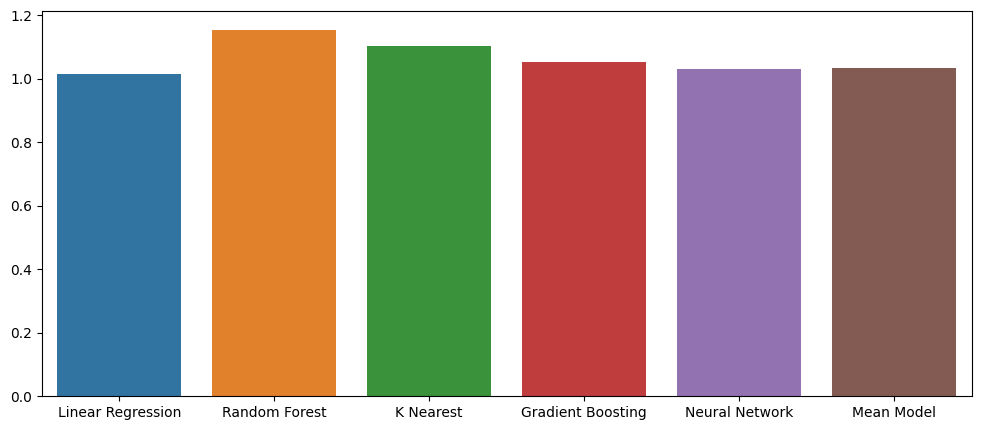

In [ ]:
sns.barplot(x = list(model_RMSE.keys()), y = list(model_RMSE.values()))

In [ ]:
def pred_pipelin(data):
    for key, value in custom_data.items():
        data[key] = (value - df[key].mean()) / df[key].std()

    decom = pca_model.transform(pd.DataFrame(custom_data, index=[0]))

    return MeanRegressor([lr_model,rf_model, knn_model, gb_model, model],list(model_RMSE.values()),decom)[0]

In [ ]:
custom_data = {
 #sales for smart phone
"Price_Range": 2,
"Battery_Power": 150.0,
"Clock_Speed": 2.5,
"FC": 15,
"Int_Memory": 64,
"Mobile_D": 122,
"Mobile_W": 153,
"Cores": 4,
"PC": 10,
"Pixel_H": 895,
"Pixel_W": 1255,
"Screen_W": 15,
"Screen_H": 5,

"Talk_Time": 15,
"Three_G": 1,
"Four_G": 0,
"Touch_Screen": 1,
"Dual_SIM": 1,
"Bluetooth": 1,
"Ram": 1452,
"WiFi": 0,





}

MLR

In [ ]:
X1 = df['Price_Range'] #independent variable
X2 = df['Ram'] #independent variable
Y = df['Battery_Power'] #dependent variable

In [ ]:
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)
y_mean = np.mean(Y)
n = X1.count()
Ex1_2 = sum(X1**2) - (sum(X1)**2/n)
Ex2_2 = sum(X2**2) - (sum(X2)**2/n)
Ex1y = sum(X1*Y) - (sum(X1)*sum(Y)/n)
Ex2y = sum(X2*Y) - (sum(X2)*sum(Y)/n)
Ex1x2 = sum(X1*X2) - (sum(X1)*sum(X2)/n)


b1 = ((Ex2_2 * Ex1y) - (Ex1x2 * Ex2y))/((Ex1_2 * Ex2_2) - (Ex1x2**2))
b2 = ((Ex1_2 * Ex2y) - (Ex1x2 * Ex1y))/((Ex1_2 * Ex2_2) - (Ex1x2**2))
b0 = y_mean - (b1*x1_mean) - (b2*x2_mean)

print(b0)
print(b1)
print(b2)

1491.9283934589366
497.4313368528828
-0.4705539881067768


In [ ]:
# 5. Find the Ypred
y_pred = b0 + (b1 * X1) + (b2 * X2)
y_pred

0        789.917615
1       1248.763524
2       1261.939036
3       1183.827074
4       1325.408053
           ...     
1995    1177.598329
1996    1530.625363
1997    1545.738862
1998    1083.016978
1999    1140.121325
Length: 2000, dtype: float64

In [ ]:
# 6. Calculate the SSE (sum of squared error)and RMSE (Root Mean Square Error) value
SSE = sum((Y - y_pred)**2)
print('Sum of squared error:', SSE)

Sum of squared error: 287610112.84334654


In [ ]:
RMSE = np.sqrt(sum((Y - y_pred)**2)/len(X1))
RMSE

379.2163715106104

In [ ]:
# 7. Calculate the coefficient of determination (r2) r-square
SSR = sum((Y - y_pred)**2)
SST = sum((Y - y_mean)**2)
r_square = 1 - (SSR/SST)
r_square

0.2548644825607733

In [ ]:
# 9. Predict the output for a given input values
input1 = [float(i) for i in input("Enter the input values 1 to predict output : ").split()]
input2 = [float(i) for i in input("Enter the input values 2 to predict output : ").split()]
print("Input1\tInput2\tOutput")
for i in range(len(input1)):
        output = b0 + (b1 * input1[i]) + (b2 * input2[i])
        print(input1[i],"\t",input2[i],"\t",output)

Enter the input values 1 to predict output : 8
Enter the input values 2 to predict output : 64
Input1	Input2	Output
8.0 	 64.0 	 5441.263633043166


new linear regression


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.score(X_train,Y_train)

0.9170426046312816

In [ ]:
Y_pred=model.predict(X_test)
Y_pred

array([ 2.72163139e+00, -1.92448477e-01,  1.77872837e+00,  1.53130494e+00,
        2.36998336e+00, -3.40857658e-01, -1.32701256e-01,  2.48629381e+00,
        2.78125246e+00,  1.13590077e+00,  6.20834513e-01,  2.75341063e+00,
        3.17322371e-01,  1.80311445e+00,  2.93228967e+00,  2.40077665e-01,
        3.42768939e+00,  1.74863906e+00,  1.79291781e+00,  8.48293396e-01,
        2.62366786e-01,  2.56872820e-01,  3.28243817e+00,  9.65593527e-01,
        1.57394287e+00,  1.69356196e+00,  3.74749749e+00,  1.11900444e+00,
        3.34759287e+00,  1.17704391e+00,  1.35933245e+00,  2.87768704e-01,
        1.61014492e+00,  5.11006513e-01,  1.53722576e+00,  3.35557271e+00,
       -5.95395950e-01, -7.83054718e-02,  3.08277252e+00,  3.23564562e+00,
        2.38055727e+00,  1.33329436e+00,  2.94773654e+00,  2.51356802e+00,
        1.20581568e+00,  3.45854690e+00, -3.14260115e-01,  1.19276707e+00,
        2.50744842e+00,  1.18861700e+00,  9.68276118e-01,  2.62073330e+00,
        2.71355809e-01,  

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
print(mean_absolute_error(Y_test,Y_pred))
print(mean_absolute_percentage_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.2747606739866767
310550246027776.6
0.10248318249564935


##Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.


In [ ]:
model_lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)

In [ ]:
model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [ ]:
model_lr.intercept_

NameError: ignored

In [ ]:
model_lr.coef_

array([[-1.45168387e-03,  3.68449832e-02,  1.01318608e-03,
         2.63362043e-02,  7.63524275e-03,  3.96128100e-02,
         8.99541647e-02,  6.58937249e-02, -1.87092786e-03,
         3.09482289e-04, -4.98282961e-03,  1.48382232e-01,
         3.86353369e-02,  9.16882165e-02,  9.04036869e-03,
         1.11354193e-02,  1.34563275e-02,  9.44333226e-03,
         8.27210294e-03,  1.01342755e-02],
       [ 4.52347632e-06,  4.63079330e-03,  1.48451592e-02,
         9.14138732e-03,  5.37900410e-03,  1.19193793e-02,
        -2.32450902e-02,  1.40305153e-02, -3.26360455e-04,
         2.79284316e-04, -7.89031781e-04,  3.99101657e-02,
        -3.21712017e-03,  3.95652751e-02,  6.84643695e-03,
         6.68034024e-03,  4.49824028e-03,  8.35326085e-03,
         2.26407085e-03,  3.06021564e-03],
       [ 4.59720997e-04, -8.47403836e-03,  5.56057057e-03,
        -1.27447579e-02, -4.87745892e-03, -9.44705890e-03,
         6.53979254e-03, -1.89402055e-02,  5.82927106e-04,
        -1.48043773e-04,  1.7

In [ ]:
Y_pred=model_lr.predict(X_test)
Y_pred

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 1, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 3, 3, 1, 3, 1, 2, 0, 2, 1, 2, 3, 0, 0, 3, 2, 2, 2, 3, 3,
       2, 3, 0, 1, 3, 2, 1, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 1, 2, 1, 1, 3,
       3, 3, 2, 2, 3, 3, 1, 0, 1, 3, 3, 2, 1, 1, 3, 1, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 2, 0, 0, 3, 2, 3, 0, 2, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3,
       2, 0, 0, 2, 2, 3, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 1, 0, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 2, 1, 3, 3, 0,
       1, 2, 3, 1, 3, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 2, 0, 2, 2, 1, 1, 3,
       2, 0, 3, 3, 3, 0, 1, 3, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3, 2, 2,
       3, 3, 0, 0, 3, 3, 2, 2, 0, 2, 0, 0, 0, 3, 2, 0, 2, 3, 0, 1, 0, 2,
       3, 2, 0, 0, 1, 3, 3, 2, 2, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 0, 1, 3,
       2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0,
       2, 3, 2, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

In [ ]:
print(accuracy_score(Y_pred,Y_test))
print(classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))


0.714
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       119
           1       0.69      0.66      0.67       116
           2       0.55      0.54      0.55       128
           3       0.74      0.76      0.75       137

    accuracy                           0.71       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.71      0.71      0.71       500

[[108  11   0   0]
 [ 15  76  24   1]
 [  1  22  69  36]
 [  0   1  32 104]]


KNN neigbohr model is used here

In [ ]:
model_knn=model_knn.fit(X_train,Y_train)

In [ ]:
Y_pred=model_knn.predict(X_test)
Y_pred

array([3, 0, 2, 2, 3, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 3, 3, 0, 2, 0, 1,

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

In [ ]:
knn=accuracy_score(Y_pred,Y_test)
print(classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))
knn

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       128
           1       0.92      0.92      0.92       110
           2       0.86      0.90      0.88       119
           3       0.94      0.92      0.93       143

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

[[122   6   0   0]
 [  2 101   7   0]
 [  0   3 107   9]
 [  0   0  11 132]]


0.924